## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3         X4         Y
0  36.897032  934.904018  0.704055   6.146791  1.406965
1  47.030483  714.352135  0.316078   5.141644  1.368167
2  30.517858  607.455289  0.436892   3.221044  1.435510
3  27.930094  221.211468  0.016633   8.382580  0.209919
4   6.694662  674.200355  0.108723  10.788670  1.483605


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9541765	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9473106	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9385818	total: 69.8ms	remaining: 23.2s
3:	learn: 0.9296381	total: 70.4ms	remaining: 17.5s
4:	learn: 0.9208353	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9128697	total: 71.3ms	remaining: 11.8s
6:	learn: 0.9070394	total: 71.9ms	remaining: 10.2s
7:	learn: 0.8998546	total: 72.5ms	remaining: 8.98s
8:	learn: 0.8898451	total: 73ms	remaining: 8.03s
9:	learn: 0.8820539	total: 73.6ms	remaining: 7.29s
10:	learn: 0.8755504	total: 74.1ms	remaining: 6.66s
11:	learn: 0.8666305	total: 74.7ms	remaining: 6.15s
12:	learn: 0.8583773	total: 75.2ms	remaining: 5.71s
13:	learn: 0.8522427	total: 75.7ms	remaining: 5.33s
14:	learn: 0.8451241	total: 76.2ms	remaining: 5.01s
15:	learn: 0.8385871	total: 76.6ms	remaining: 4.71s
16:	learn: 0.8318984	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8249482	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8189869	total: 77.9ms	remaining: 

114:	learn: 0.4097736	total: 119ms	remaining: 914ms
115:	learn: 0.4067219	total: 119ms	remaining: 908ms
116:	learn: 0.4043156	total: 120ms	remaining: 902ms
117:	learn: 0.4019982	total: 120ms	remaining: 899ms
118:	learn: 0.3990917	total: 121ms	remaining: 893ms
119:	learn: 0.3969178	total: 121ms	remaining: 888ms
120:	learn: 0.3944950	total: 121ms	remaining: 881ms
121:	learn: 0.3921450	total: 122ms	remaining: 876ms
122:	learn: 0.3901307	total: 122ms	remaining: 871ms
123:	learn: 0.3879849	total: 123ms	remaining: 866ms
124:	learn: 0.3853120	total: 123ms	remaining: 861ms
125:	learn: 0.3829271	total: 123ms	remaining: 856ms
126:	learn: 0.3813484	total: 124ms	remaining: 851ms
127:	learn: 0.3792160	total: 124ms	remaining: 847ms
128:	learn: 0.3768310	total: 125ms	remaining: 842ms
129:	learn: 0.3749485	total: 125ms	remaining: 838ms
130:	learn: 0.3721514	total: 126ms	remaining: 834ms
131:	learn: 0.3703169	total: 126ms	remaining: 829ms
132:	learn: 0.3686276	total: 127ms	remaining: 825ms
133:	learn: 

268:	learn: 0.1852246	total: 186ms	remaining: 506ms
269:	learn: 0.1844211	total: 187ms	remaining: 504ms
270:	learn: 0.1835879	total: 187ms	remaining: 503ms
271:	learn: 0.1826666	total: 188ms	remaining: 502ms
272:	learn: 0.1817040	total: 188ms	remaining: 500ms
273:	learn: 0.1807851	total: 188ms	remaining: 499ms
274:	learn: 0.1797810	total: 189ms	remaining: 498ms
275:	learn: 0.1788366	total: 189ms	remaining: 496ms
276:	learn: 0.1781134	total: 190ms	remaining: 495ms
277:	learn: 0.1776926	total: 190ms	remaining: 493ms
278:	learn: 0.1767309	total: 190ms	remaining: 492ms
279:	learn: 0.1758656	total: 191ms	remaining: 491ms
280:	learn: 0.1751071	total: 191ms	remaining: 489ms
281:	learn: 0.1743961	total: 192ms	remaining: 488ms
282:	learn: 0.1735535	total: 192ms	remaining: 487ms
283:	learn: 0.1726217	total: 193ms	remaining: 486ms
284:	learn: 0.1720770	total: 193ms	remaining: 485ms
285:	learn: 0.1713481	total: 194ms	remaining: 483ms
286:	learn: 0.1705302	total: 194ms	remaining: 482ms
287:	learn: 

527:	learn: 0.0763923	total: 301ms	remaining: 269ms
528:	learn: 0.0763356	total: 301ms	remaining: 268ms
529:	learn: 0.0761370	total: 301ms	remaining: 267ms
530:	learn: 0.0760812	total: 302ms	remaining: 267ms
531:	learn: 0.0760261	total: 303ms	remaining: 266ms
532:	learn: 0.0758738	total: 303ms	remaining: 265ms
533:	learn: 0.0757931	total: 303ms	remaining: 265ms
534:	learn: 0.0757399	total: 304ms	remaining: 264ms
535:	learn: 0.0755911	total: 304ms	remaining: 263ms
536:	learn: 0.0755388	total: 305ms	remaining: 263ms
537:	learn: 0.0754237	total: 305ms	remaining: 262ms
538:	learn: 0.0750912	total: 306ms	remaining: 261ms
539:	learn: 0.0750145	total: 306ms	remaining: 261ms
540:	learn: 0.0749393	total: 307ms	remaining: 260ms
541:	learn: 0.0746131	total: 307ms	remaining: 260ms
542:	learn: 0.0745393	total: 308ms	remaining: 259ms
543:	learn: 0.0743555	total: 308ms	remaining: 258ms
544:	learn: 0.0742436	total: 309ms	remaining: 258ms
545:	learn: 0.0741719	total: 309ms	remaining: 257ms
546:	learn: 

685:	learn: 0.0485185	total: 368ms	remaining: 168ms
686:	learn: 0.0484913	total: 368ms	remaining: 168ms
687:	learn: 0.0484389	total: 369ms	remaining: 167ms
688:	learn: 0.0482417	total: 369ms	remaining: 167ms
689:	learn: 0.0482134	total: 370ms	remaining: 166ms
690:	learn: 0.0481332	total: 370ms	remaining: 165ms
691:	learn: 0.0481065	total: 370ms	remaining: 165ms
692:	learn: 0.0480554	total: 371ms	remaining: 164ms
693:	learn: 0.0478140	total: 371ms	remaining: 164ms
694:	learn: 0.0477040	total: 372ms	remaining: 163ms
695:	learn: 0.0475283	total: 372ms	remaining: 162ms
696:	learn: 0.0473116	total: 373ms	remaining: 162ms
697:	learn: 0.0472840	total: 373ms	remaining: 161ms
698:	learn: 0.0472571	total: 373ms	remaining: 161ms
699:	learn: 0.0471025	total: 374ms	remaining: 160ms
700:	learn: 0.0468914	total: 374ms	remaining: 160ms
701:	learn: 0.0467406	total: 375ms	remaining: 159ms
702:	learn: 0.0466338	total: 375ms	remaining: 159ms
703:	learn: 0.0464286	total: 376ms	remaining: 158ms
704:	learn: 

948:	learn: 0.0281405	total: 482ms	remaining: 25.9ms
949:	learn: 0.0280214	total: 482ms	remaining: 25.4ms
950:	learn: 0.0279054	total: 483ms	remaining: 24.9ms
951:	learn: 0.0278998	total: 483ms	remaining: 24.4ms
952:	learn: 0.0277654	total: 484ms	remaining: 23.9ms
953:	learn: 0.0277598	total: 484ms	remaining: 23.3ms
954:	learn: 0.0276478	total: 484ms	remaining: 22.8ms
955:	learn: 0.0276422	total: 485ms	remaining: 22.3ms
956:	learn: 0.0276367	total: 485ms	remaining: 21.8ms
957:	learn: 0.0276313	total: 486ms	remaining: 21.3ms
958:	learn: 0.0275010	total: 486ms	remaining: 20.8ms
959:	learn: 0.0273968	total: 487ms	remaining: 20.3ms
960:	learn: 0.0273413	total: 487ms	remaining: 19.8ms
961:	learn: 0.0272394	total: 488ms	remaining: 19.3ms
962:	learn: 0.0271849	total: 488ms	remaining: 18.7ms
963:	learn: 0.0270855	total: 489ms	remaining: 18.2ms
964:	learn: 0.0270773	total: 489ms	remaining: 17.7ms
965:	learn: 0.0270238	total: 490ms	remaining: 17.2ms
966:	learn: 0.0269266	total: 490ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


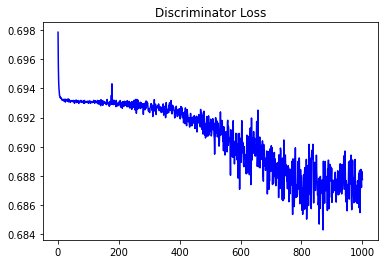

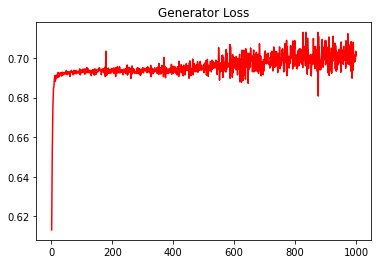

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23264518751013746


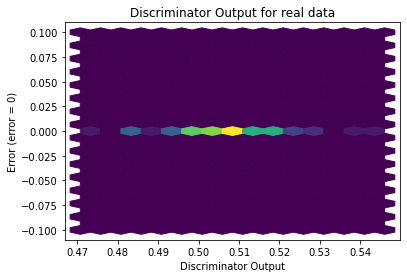

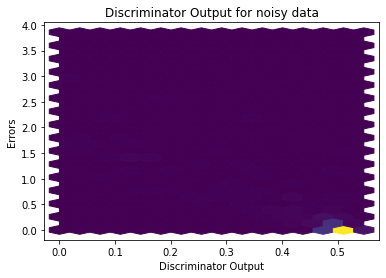

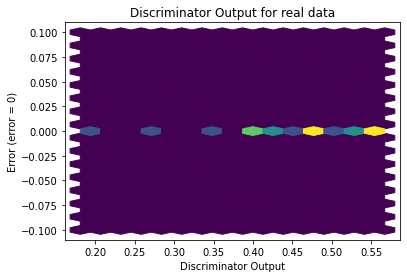

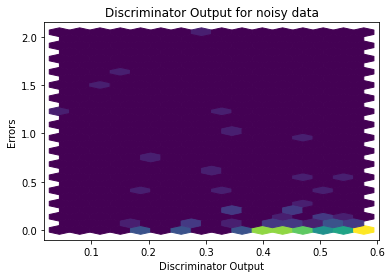

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1318]], requires_grad=True)
